### Testes variando os parâmetros k e h da KNN Ponderada

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Calcula a densidade de probabilidade da distribuição normal multivariada
def pdfnvar(x, m, K):
    n = len(x)
    K_inv = np.linalg.inv(K)
    det_K = np.linalg.det(K)
    norm_factor = 1 / (np.sqrt((2 * np.pi) ** n * det_K))
    exp_term = np.exp(-0.5 * (x - m).T @ K_inv @ (x - m))
    return norm_factor * exp_term

In [ ]:
# KNN ponderado usando a densidade da Gaussiana Multivariada
def myknn_weighted(xt, xall, yall, k, K):
    dall = np.sqrt(np.sum((xall - xt) ** 2, axis=1))
    orddall = np.argsort(dall)
    nearest_k = orddall[:k]

    weights = np.array([pdfnvar(xall[i], xt, K) for i in nearest_k])
    yhat = np.sign(np.sum(weights * yall[nearest_k]))
    return yhat

In [ ]:
# Computa Q1 e Q2 baseado nos k vizinhos mais próximos
def compute_Q(xt, xall, yall, k, K):
    dall = np.sqrt(np.sum((xall - xt) ** 2, axis=1))
    orddall = np.argsort(dall)
    nearest_k = orddall[:k]

    weights = np.array([pdfnvar(xall[i], xt, K) for i in nearest_k])

    Q1 = np.sum(weights[yall[nearest_k] == 1])  # Somatório para classe 1
    Q2 = np.sum(weights[yall[nearest_k] == -1])  # Somatório para classe -1

    return Q1, Q2

In [ ]:
# Gera dados sintéticos linearmente e não-linearmente separáveis
def generate_data(linear=True, N=50):
    np.random.seed(42)
    if linear:
        xc1 = np.random.normal(loc=2, scale=1, size=(N, 2))
        xc2 = np.random.normal(loc=4, scale=1, size=(N, 2))
    else:
        theta = np.linspace(0, 2 * np.pi, N)
        xc1 = np.column_stack((2 + np.cos(theta), 2 + np.sin(theta)))
        xc2 = np.column_stack((4 + np.cos(theta), 4 + np.sin(theta)))

    yc1 = np.full((N,), -1)
    yc2 = np.full((N,), 1)

    X_train = np.vstack((xc1, xc2))
    y_train = np.hstack((yc1, yc2))

    return X_train, y_train

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=5, h=0.5)


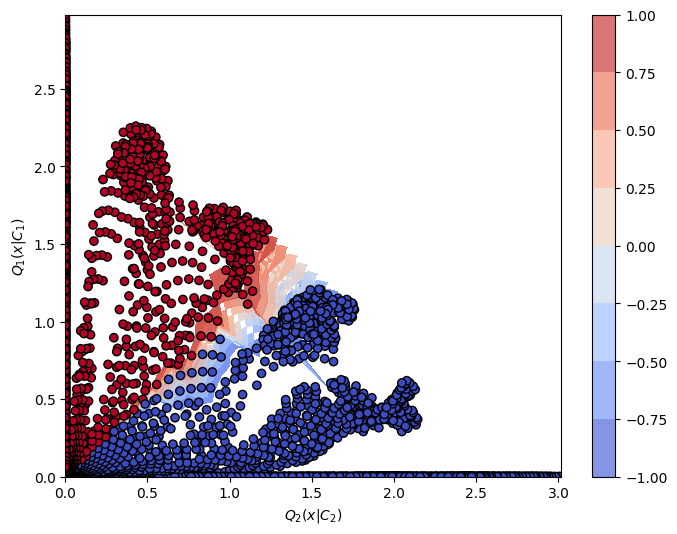

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=5, h=1.0)


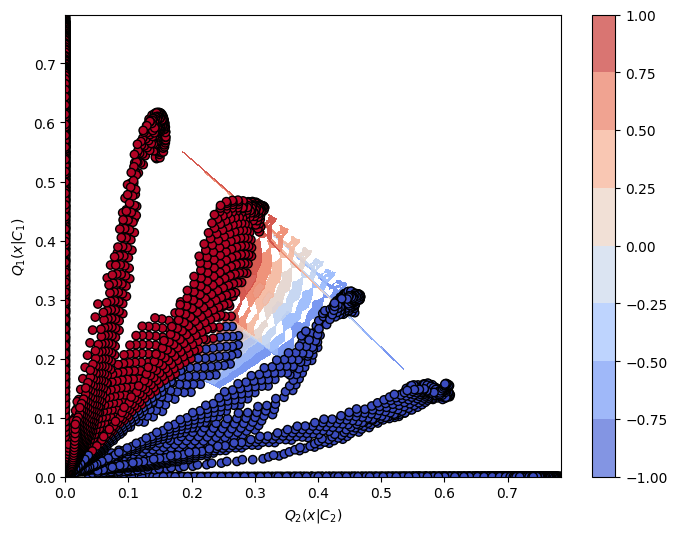

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=5, h=2.0)


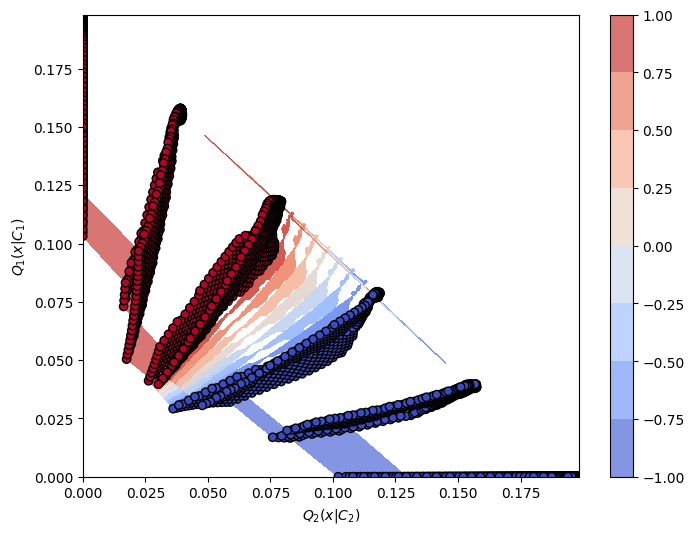

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=10, h=0.5)


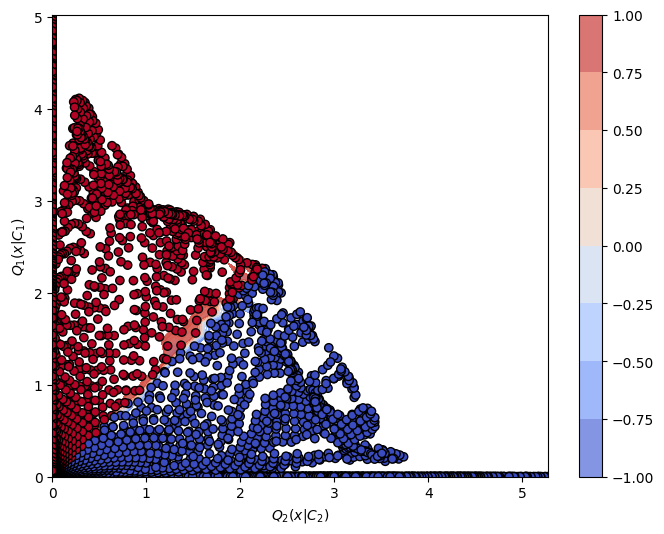

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=10, h=1.0)


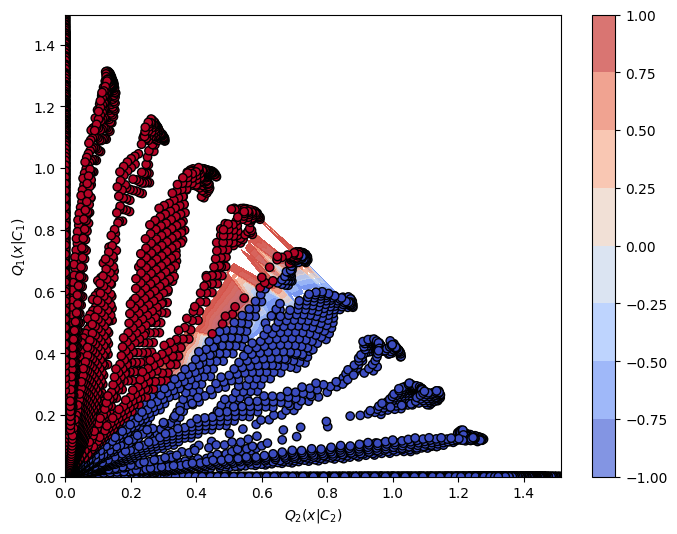

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=10, h=2.0)


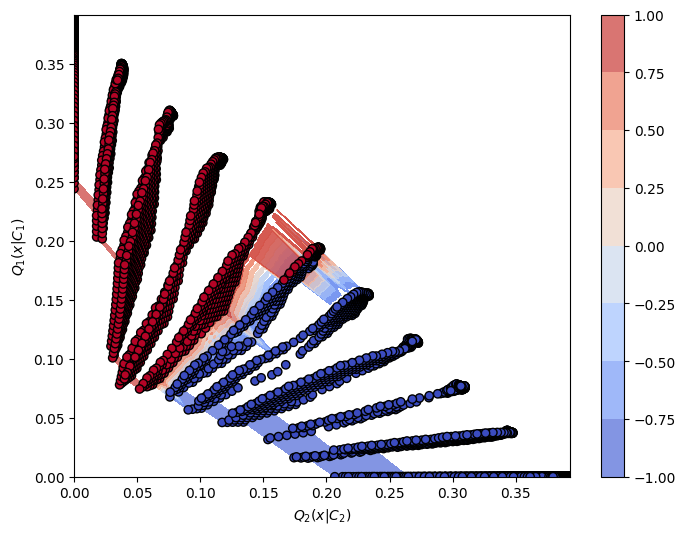

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=15, h=0.5)


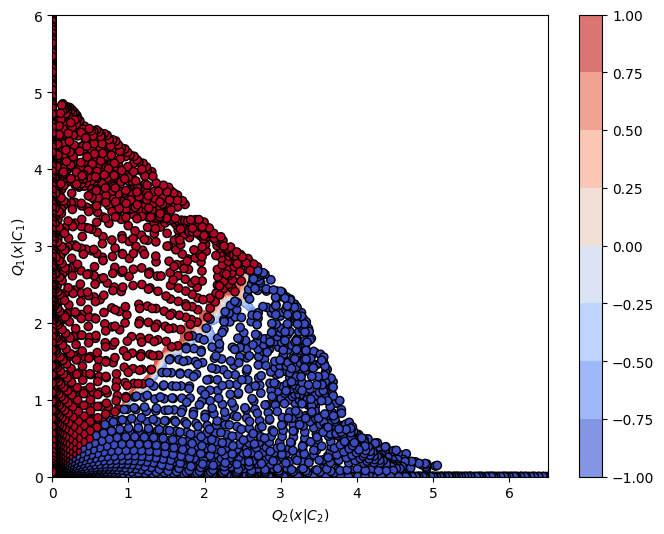

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=15, h=1.0)


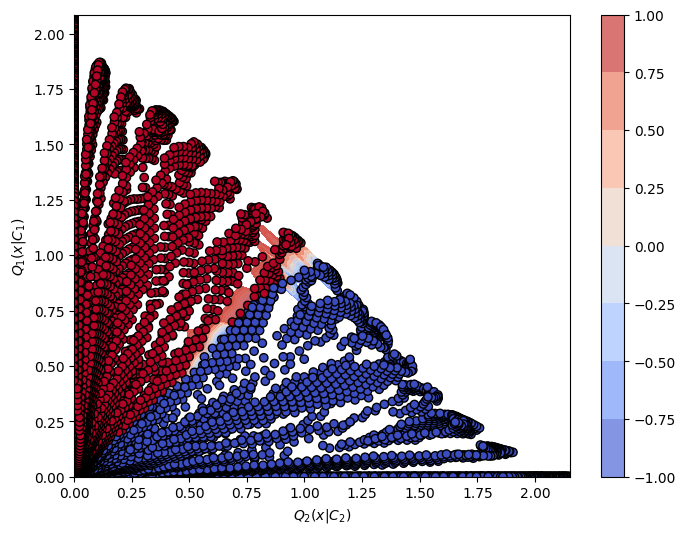

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=15, h=2.0)


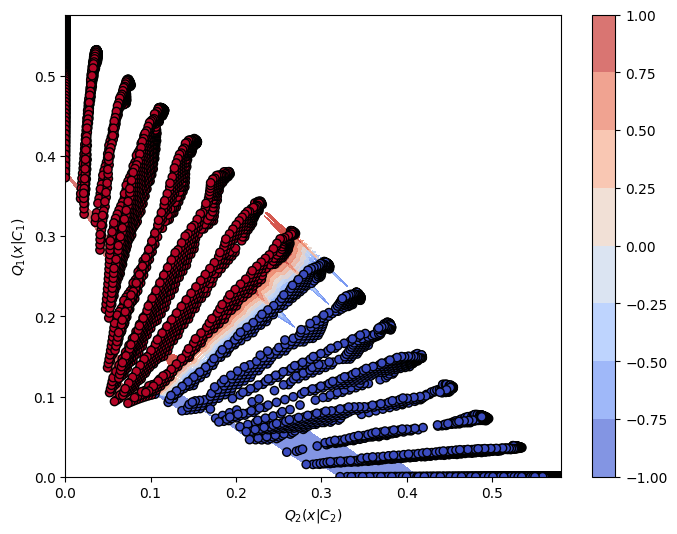

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=20, h=0.5)


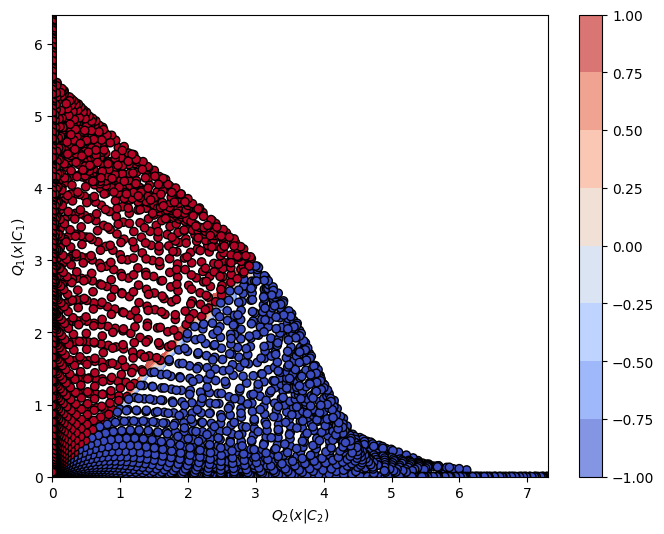

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=20, h=1.0)


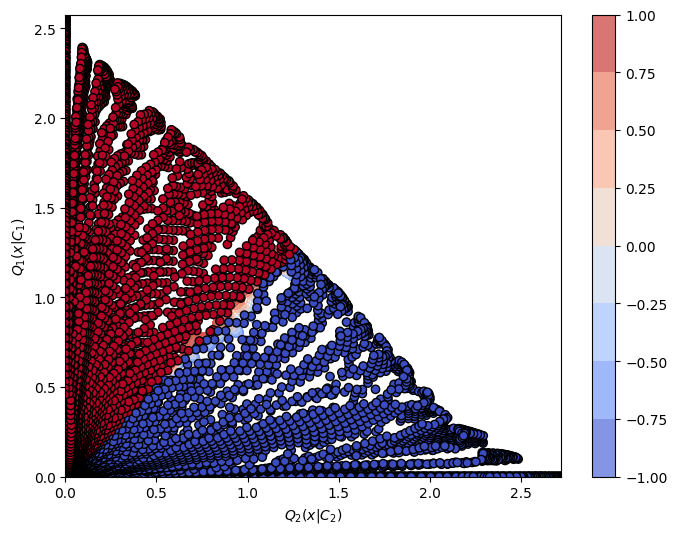

Mapeamento no plano Q2 × Q1 (Linearmente Separável, k=20, h=2.0)


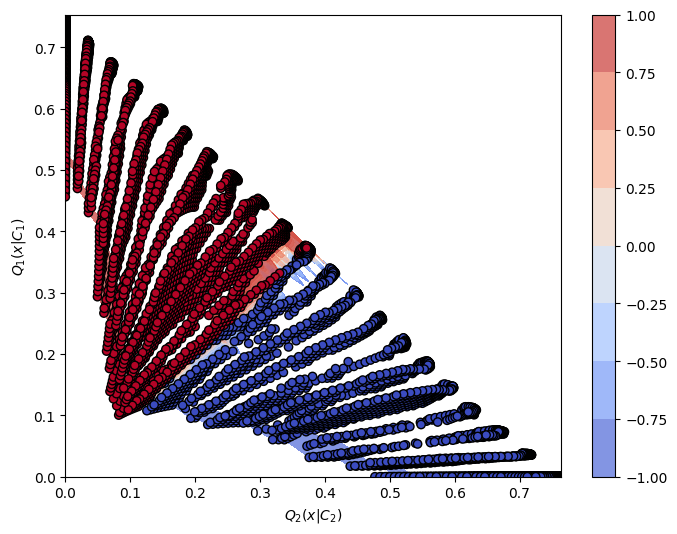

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=5, h=0.5)


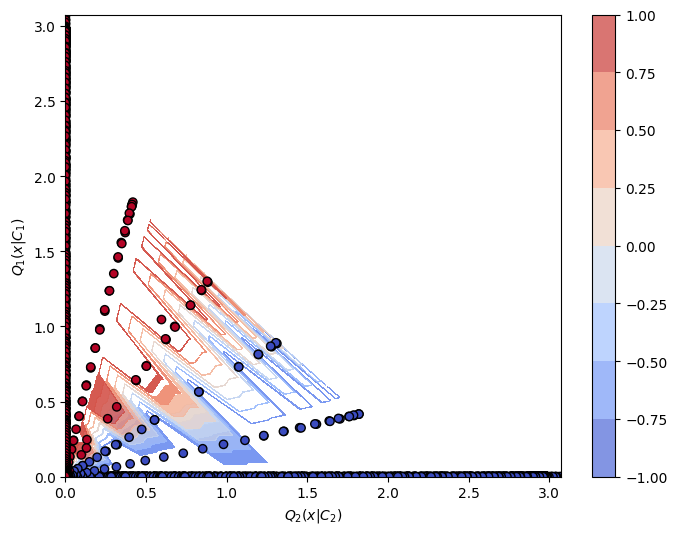

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=5, h=1.0)


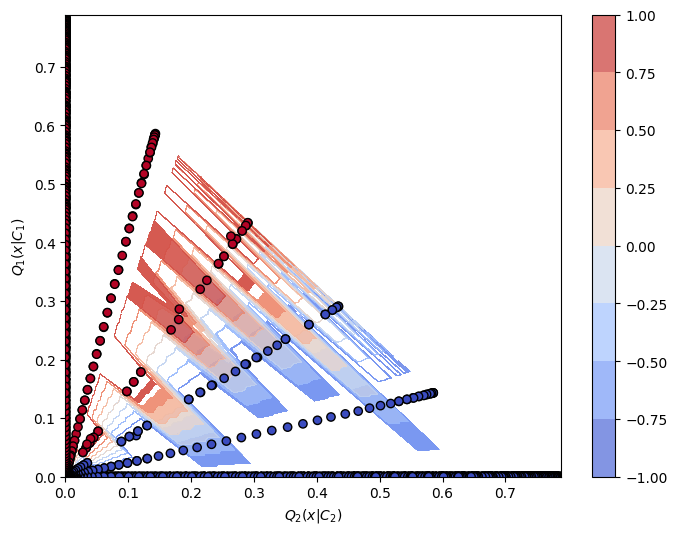

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=5, h=2.0)


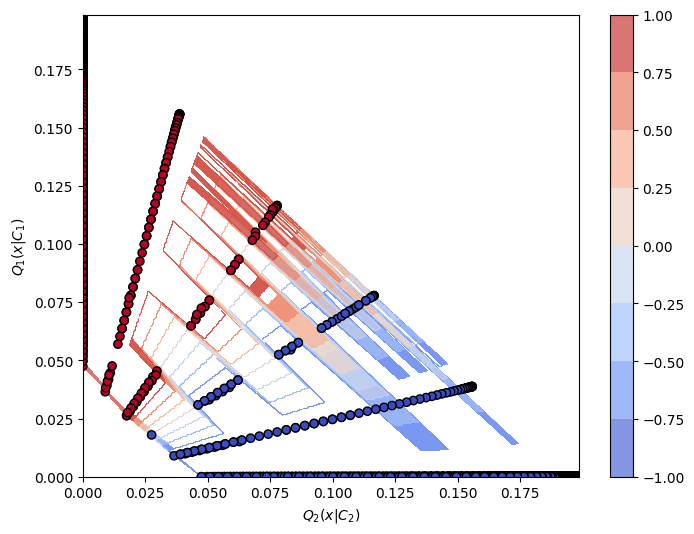

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=10, h=0.5)


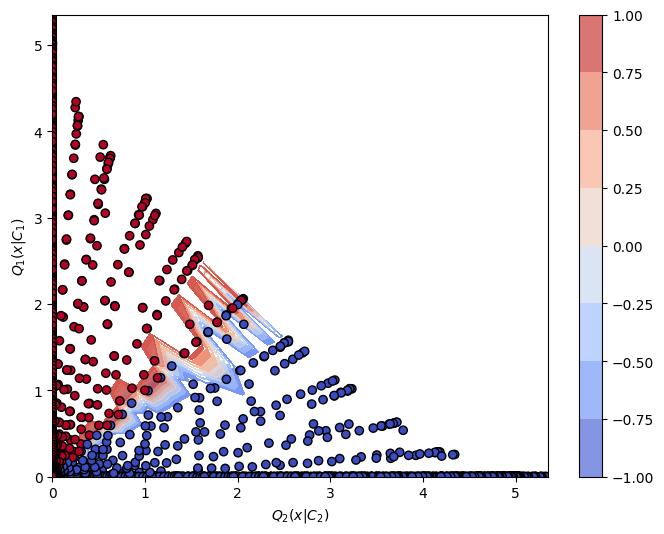

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=10, h=1.0)


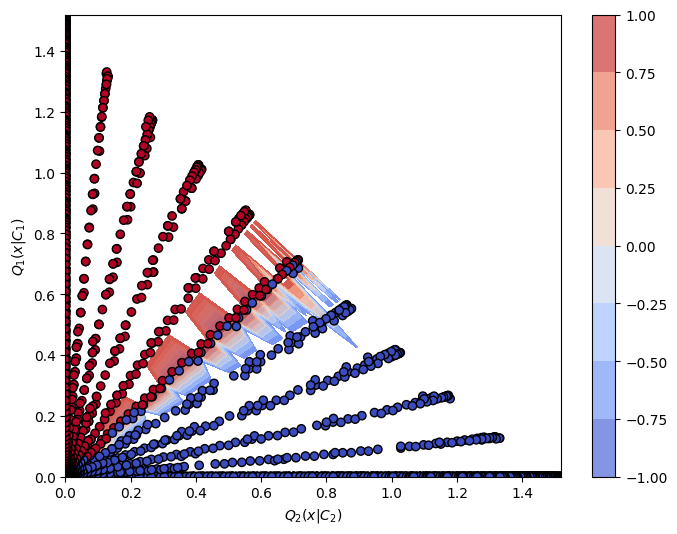

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=10, h=2.0)


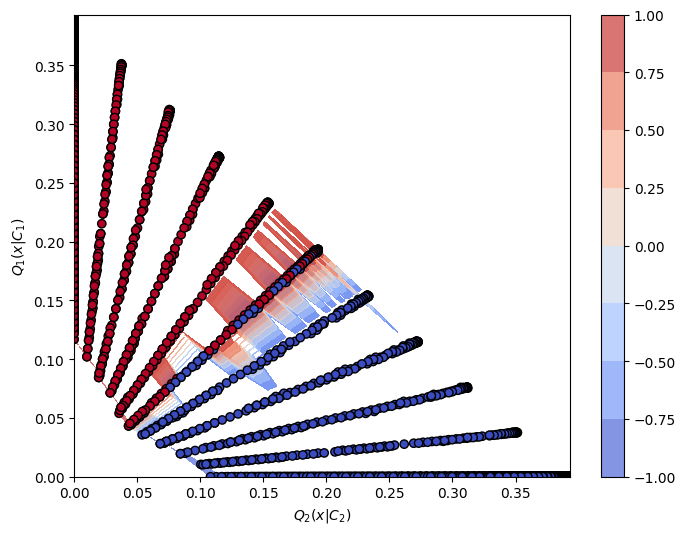

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=15, h=0.5)


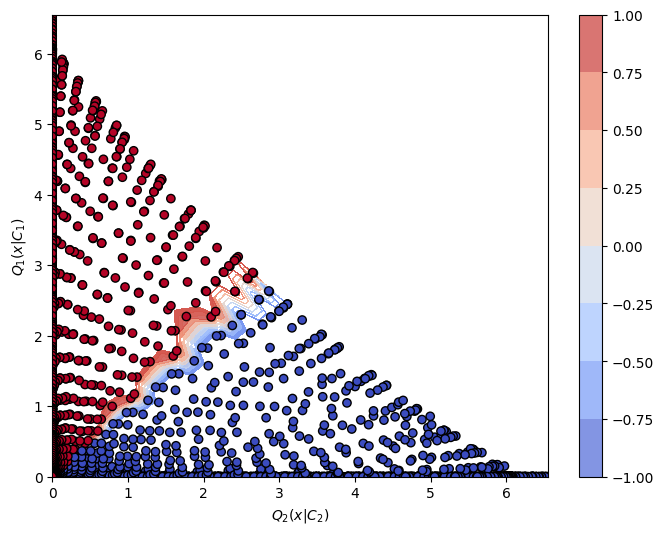

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=15, h=1.0)


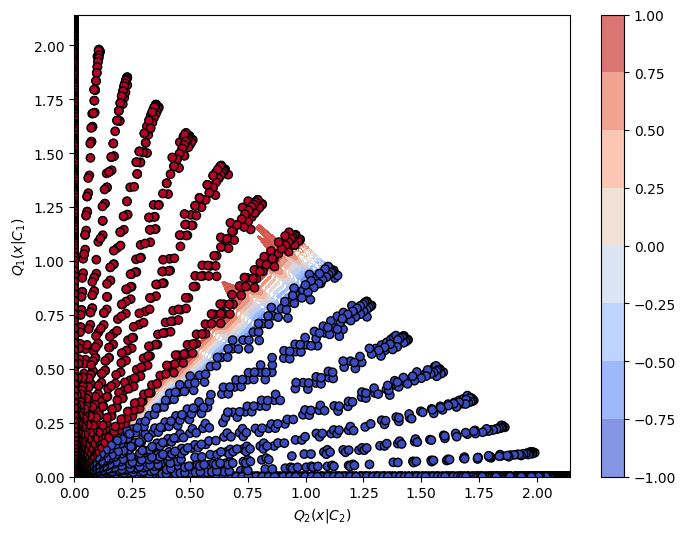

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=15, h=2.0)


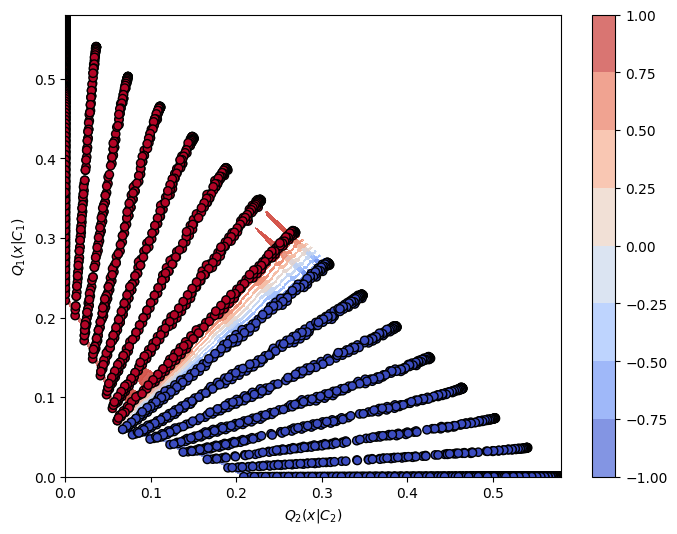

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=20, h=0.5)


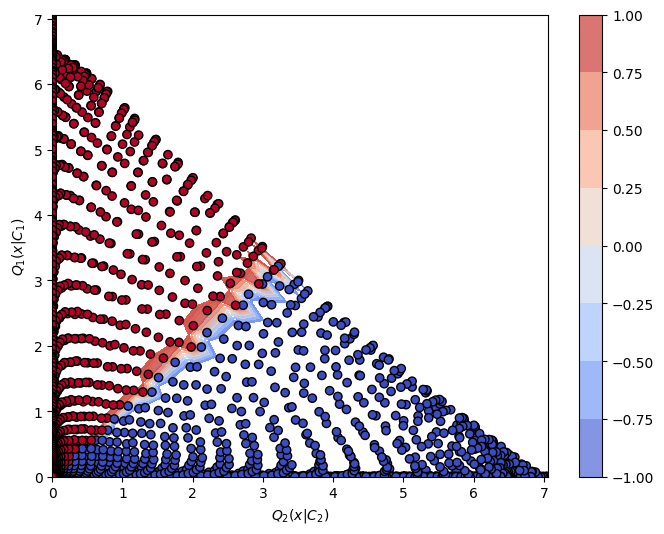

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=20, h=1.0)


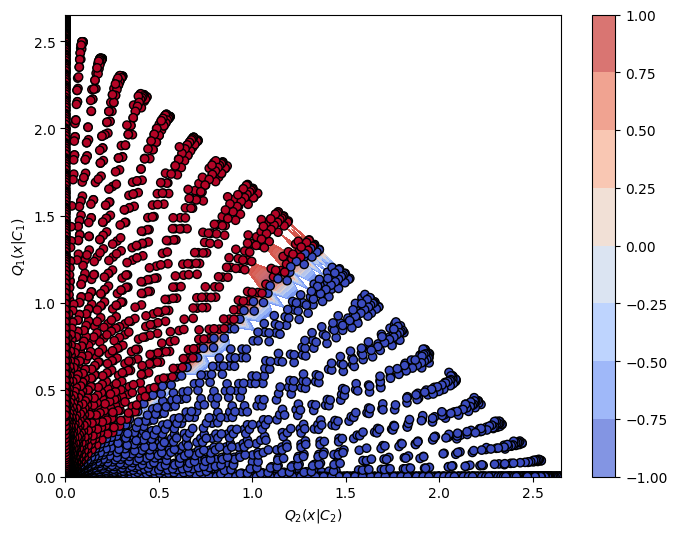

Mapeamento no plano Q2 × Q1 (Não-Linearmente Separável, k=20, h=2.0)


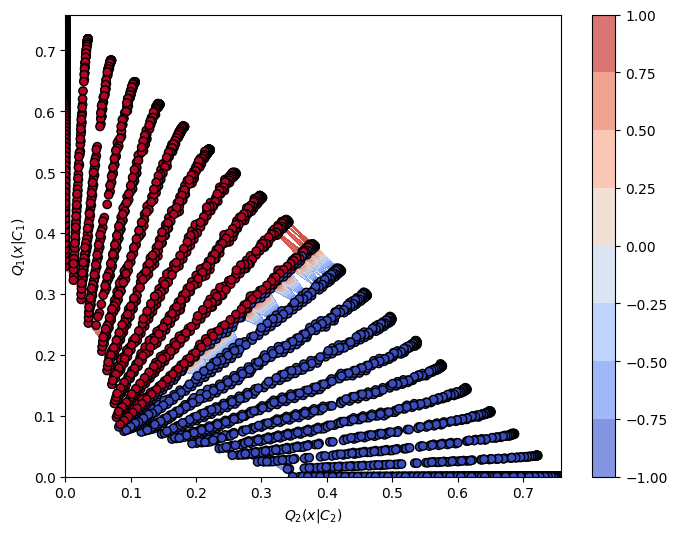

In [15]:
# Parâmetros
k_values = [5, 10, 15, 20]
h_values = [0.5, 1.0, 2.0]

for linear in [True, False]:
    dataset_type = "Linearmente Separável" if linear else "Não-Linearmente Separável"

    for k in k_values:
        for h in h_values:
            K = (h ** 2) * np.eye(2)  # Matriz de covariância
            X_train, y_train = generate_data(linear=linear, N=50)

            x_values = np.linspace(0, 6, 100)
            y_values = np.linspace(0, 6, 100)
            X, Y = np.meshgrid(x_values, y_values)

            Q_map = np.array([compute_Q(np.array([x, y]), X_train, y_train, k, K) for x, y in zip(X.ravel(), Y.ravel())])
            Q1_map, Q2_map = Q_map[:, 0].reshape(X.shape), Q_map[:, 1].reshape(X.shape)

            print(f'Mapeamento no plano Q2 × Q1 ({dataset_type}, k={k}, h={h})')

            fig, ax = plt.subplots(figsize=(8, 6))
            contour = ax.contourf(Q2_map, Q1_map, np.sign(Q1_map - Q2_map), cmap='coolwarm', alpha=0.7)
            ax.scatter(Q2_map.ravel(), Q1_map.ravel(), c=np.sign(Q1_map.ravel() - Q2_map.ravel()), cmap='coolwarm', edgecolors='black')
            ax.set_xlabel('$Q_2(x|C_2)$')
            ax.set_ylabel('$Q_1(x|C_1)$')
            #ax.set_title(f'Mapeamento no plano $Q_2 \\times Q_1$ ({dataset_type}, k={k}, h={h})')
            plt.colorbar(contour)
            plt.show()

### Obtenção do conjunto de parâmetros com desempenho máximo

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [19]:
# Função para calcular densidade Gaussiana
def pdfnvar(x, m, K):
    n = len(x)
    K_inv = np.linalg.inv(K)
    det_K = np.linalg.det(K)
    norm_factor = 1 / (np.sqrt((2 * np.pi) ** n * det_K))
    exp_term = np.exp(-0.5 * (x - m).T @ K_inv @ (x - m))
    return norm_factor * exp_term

In [20]:
# KNN ponderado com densidade Gaussiana
def myknn_weighted(xt, xall, yall, k, K):
    dall = np.sqrt(np.sum((xall - xt) ** 2, axis=1))
    orddall = np.argsort(dall)
    nearest_k = orddall[:k]
    weights = np.array([pdfnvar(xall[i], xt, K) for i in nearest_k])
    yhat = np.sign(np.sum(weights * yall[nearest_k]))
    return yhat

In [21]:
# Computa Q1 e Q2
def compute_Q(xt, xall, yall, k, K):
    dall = np.sqrt(np.sum((xall - xt) ** 2, axis=1))
    orddall = np.argsort(dall)
    nearest_k = orddall[:k]
    weights = np.array([pdfnvar(xall[i], xt, K) for i in nearest_k])
    Q1 = np.sum(weights[yall[nearest_k] == 1])
    Q2 = np.sum(weights[yall[nearest_k] == -1])
    return Q1, Q2

In [22]:
# Geração de dados
def generate_data(linear=True, N=100):
    np.random.seed(42)
    if linear:
        xc1 = np.random.normal(loc=2, scale=1, size=(N, 2))
        xc2 = np.random.normal(loc=4, scale=1, size=(N, 2))
    else:
        theta = np.linspace(0, 2 * np.pi, N)
        xc1 = np.column_stack((2 + np.cos(theta), 2 + np.sin(theta)))
        xc2 = np.column_stack((4 + np.cos(theta), 4 + np.sin(theta)))
    yc1 = np.full((N,), -1)
    yc2 = np.full((N,), 1)
    X = np.vstack((xc1, xc2))
    y = np.hstack((yc1, yc2))
    return X, y

In [23]:
# Parâmetros para busca
k_values = np.arange(1, 71, 1)
h_values = np.arange(0.1, 20.1, 0.1)

# Dados
total_X, total_y = generate_data(linear=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_k, best_h, best_acc = 0, 0, 0

for k in k_values:
    for h in h_values:
        acc_list = []
        K = (h ** 2) * np.eye(2)

        for train_idx, test_idx in kf.split(total_X):
            X_train, X_test = total_X[train_idx], total_X[test_idx]
            y_train, y_test = total_y[train_idx], total_y[test_idx]

            y_pred = np.array([myknn_weighted(xt, X_train, y_train, k, K) for xt in X_test])
            acc_list.append(accuracy_score(y_test, y_pred))

        mean_acc = np.mean(acc_list)
        if mean_acc > best_acc:
            best_k, best_h, best_acc = k, h, mean_acc

print(f'Melhor k: {best_k}, Melhor h: {best_h}, Acurácia: {best_acc}')

Melhor k: 7, Melhor h: 0.5, Acurácia: 0.9349999999999999


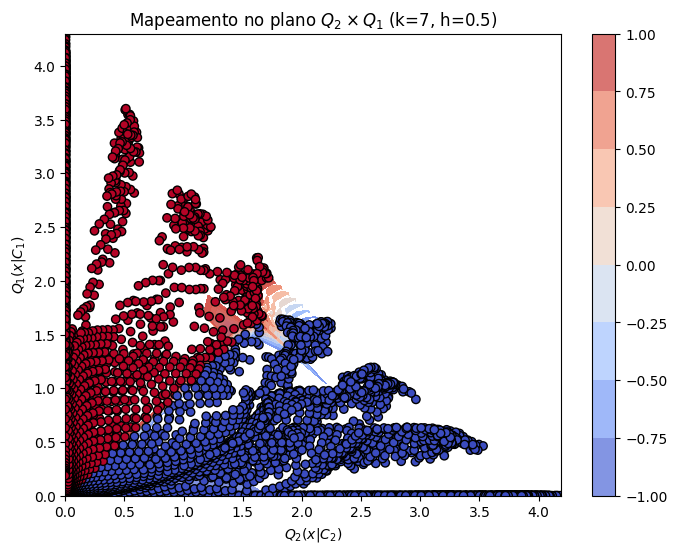

In [25]:
# Plotando o mapeamento no plano Q2 x Q1
K_best = (best_h ** 2) * np.eye(2)
x_values = np.linspace(0, 6, 100)
y_values = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x_values, y_values)

Q_map = np.array([compute_Q(np.array([x, y]), total_X, total_y, best_k, K_best) for x, y in zip(X.ravel(), Y.ravel())])
Q1_map, Q2_map = Q_map[:, 0].reshape(X.shape), Q_map[:, 1].reshape(X.shape)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(Q2_map, Q1_map, np.sign(Q1_map - Q2_map), cmap='coolwarm', alpha=0.7)
ax.scatter(Q2_map.ravel(), Q1_map.ravel(), c=np.sign(Q1_map.ravel() - Q2_map.ravel()), cmap='coolwarm', edgecolors='black')
ax.set_xlabel('$Q_2(x|C_2)$')
ax.set_ylabel('$Q_1(x|C_1)$')
ax.set_title(f'Mapeamento no plano $Q_2 \\times Q_1$ (k={best_k}, h={best_h})')
plt.colorbar(contour)
plt.show()